In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("final_generated_responses_corrected.csv")

df_output = df[["id", "generated_response_prompt1", "generated_response_prompt2", "physician_comments"]].copy()

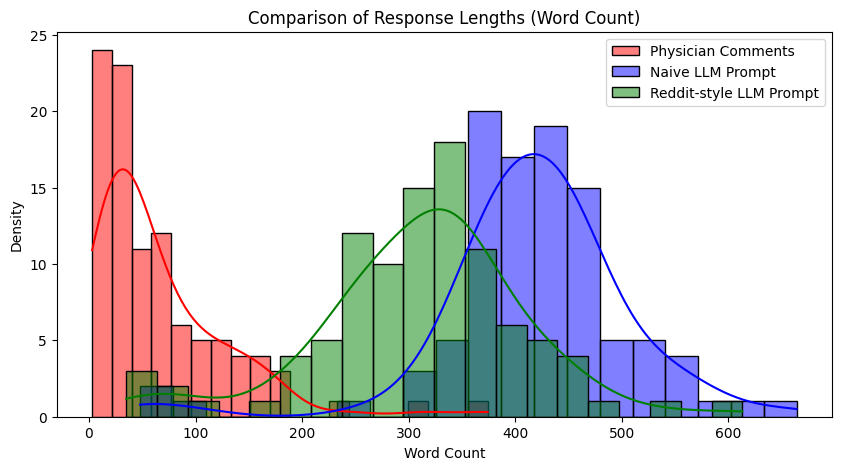

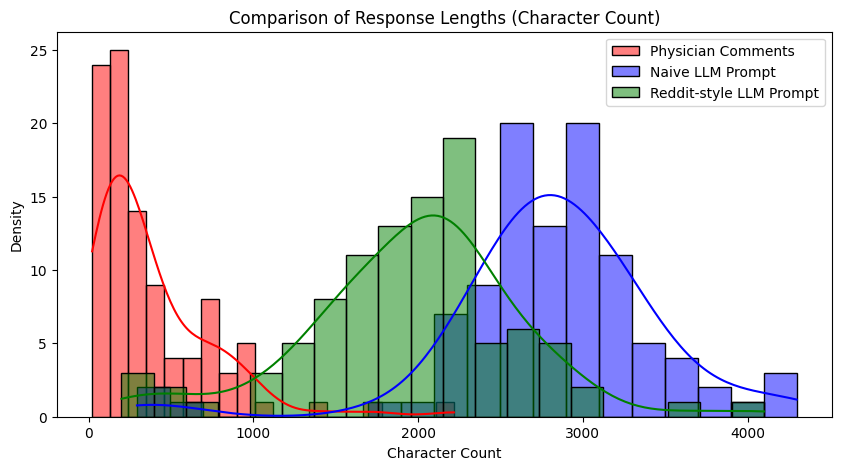

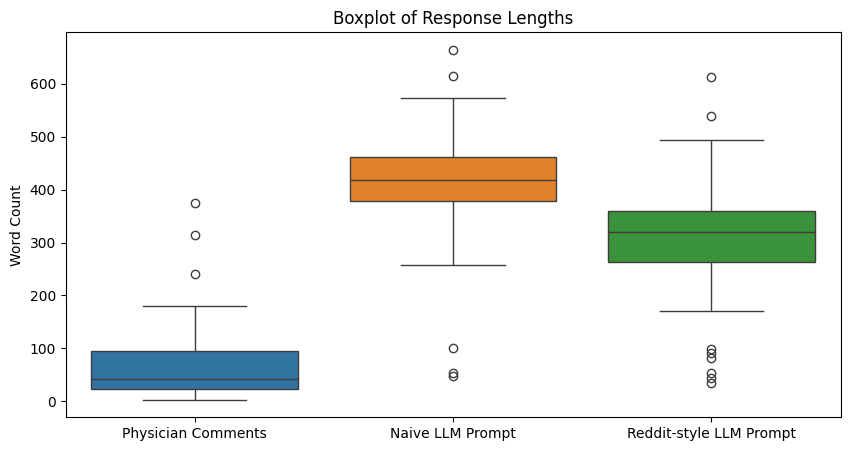

In [11]:
# Word and Character Counts
df_output["llm1_word_count"] = df["generated_response_prompt1"].fillna("").apply(lambda x: len(x.split()))
df_output["llm1_char_count"] = df["generated_response_prompt1"].fillna("").apply(len)

df_output["llm2_word_count"] = df["generated_response_prompt2"].fillna("").apply(lambda x: len(x.split()))
df_output["llm2_char_count"] = df["generated_response_prompt2"].fillna("").apply(len)

df_output["physician_word_count"] = df["physician_comments"].fillna("").apply(lambda x: len(x.split()))
df_output["physician_char_count"] = df["physician_comments"].fillna("").apply(len)

# Plot Word Count Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_output["physician_word_count"], label="Physician Comments", kde=True, color="red", bins=20)
sns.histplot(df_output["llm1_word_count"], label="Naive LLM Prompt", kde=True, color="blue", bins=20)
sns.histplot(df_output["llm2_word_count"], label="Reddit-style LLM Prompt", kde=True, color="green", bins=20)
plt.xlabel("Word Count")
plt.ylabel("Density")
plt.title("Comparison of Response Lengths (Word Count)")
plt.legend()
plt.show()

# Plot Character Count Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_output["physician_char_count"], label="Physician Comments", kde=True, color="red", bins=20)
sns.histplot(df_output["llm1_char_count"], label="Naive LLM Prompt", kde=True, color="blue", bins=20)
sns.histplot(df_output["llm2_char_count"], label="Reddit-style LLM Prompt", kde=True, color="green", bins=20)
plt.xlabel("Character Count")
plt.ylabel("Density")
plt.title("Comparison of Response Lengths (Character Count)")
plt.legend()
plt.show()

# Boxplot of Word Counts
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_output[["physician_word_count", "llm1_word_count", "llm2_word_count"]])
plt.xticks(ticks=[0, 1, 2], labels=["Physician Comments", "Naive LLM Prompt", "Reddit-style LLM Prompt"])
plt.ylabel("Word Count")
plt.title("Boxplot of Response Lengths")
plt.show()

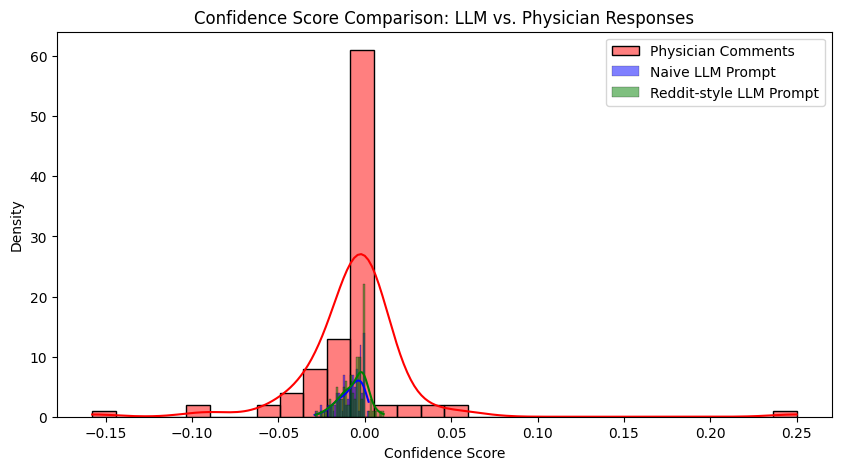

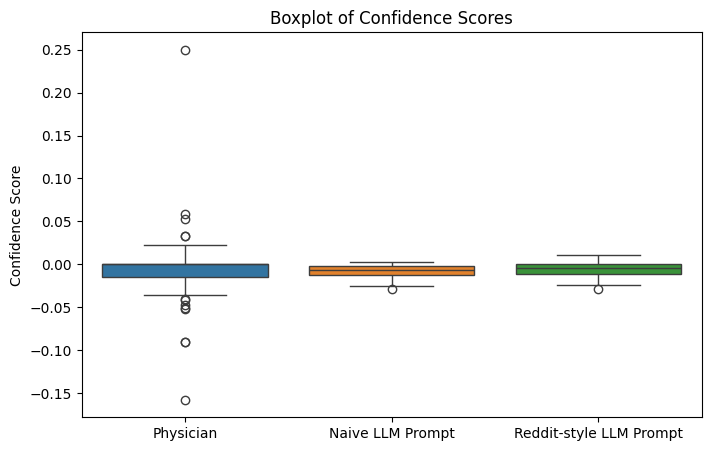

In [12]:
certainty_words = {
    "definitely", "certainly", "without a doubt", "absolutely", "always",
    "undoubtedly", "clearly", "conclusively", "proven", "is known to",
    "research confirms", "demonstrates", "must be", "all cases of",
    "is a characteristic symptom of", "is diagnostic of", "invariably"
}

uncertainty_words = {
    "might", "could", "possibly", "potentially", "maybe", "suggests",
    "indicates", "appears to", "likely", "unlikely", "somewhat",
    "is not always", "may be related to", "has been reported in",
    "a possible cause", "one of the potential reasons"
}

def confidence_score(response):
    words = response.lower().split()
    certain_count = sum(word in certainty_words for word in words)
    uncertain_count = sum(word in uncertainty_words for word in words)
    total_words = len(words) if len(words) > 0 else 1
    return (certain_count - uncertain_count) / total_words

# Calc Confidence Scores
df["confidence_score_llm1"] = df["generated_response_prompt1"].fillna("").apply(confidence_score)
df["confidence_score_llm2"] = df["generated_response_prompt2"].fillna("").apply(confidence_score)
df["confidence_score_physician"] = df["physician_comments"].fillna("").apply(confidence_score)

# Plot Confidence Scores
plt.figure(figsize=(10, 5))
sns.histplot(df["confidence_score_physician"], label="Physician Comments", kde=True, color="red", bins=30)
sns.histplot(df["confidence_score_llm1"], label="Naive LLM Prompt", kde=True, color="blue", bins=30)
sns.histplot(df["confidence_score_llm2"], label="Reddit-style LLM Prompt", kde=True, color="green", bins=30)
plt.xlabel("Confidence Score")
plt.ylabel("Density")
plt.title("Confidence Score Comparison: LLM vs. Physician Responses")
plt.legend()
plt.show()

# Boxplot for Confidence Scores
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[["confidence_score_physician", "confidence_score_llm1", "confidence_score_llm2"]])
plt.xticks(ticks=[0, 1, 2], labels=["Physician", "Naive LLM Prompt", "Reddit-style LLM Prompt"])
plt.ylabel("Confidence Score")
plt.title("Boxplot of Confidence Scores")
plt.show()